In [6]:
import pandas as pd  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import scipy.optimize as sco
from scipy.optimize import minimize
from pandas_datareader import data as wb
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [14]:
num_stocks = int(input("Number of stocks in the portfolio?"))

number = ['first', 'second', 'thirth', 'fourth', 'fifth', 'sixth', 'seventh', 'eight', 'ninth', 'tenth']
stocks = []

for num in range (num_stocks):
    stocks.append(input("Name of the " + number[num] + " stock?"))
print(stocks)


Number of stocks in the portfolio?10
Name of the first stock?AA
Name of the second stock?AAPL
Name of the thirth stock?CSCO
Name of the fourth stock?CVS
Name of the fifth stock?DIS
Name of the sixth stock?GOOGL
Name of the seventh stock?JPM
Name of the eight stock?MSFT
Name of the ninth stock?V
Name of the tenth stock?WFC
['AA', 'AAPL', 'CSCO', 'CVS', 'DIS', 'GOOGL', 'JPM', 'MSFT', 'V', 'WFC']


In [15]:
investment_duration = float(input('How many years would this portfolio investment hold? (can be fraction)'))
expected_daily_returns = []
for num in range(num_stocks):
    expected_daily_returns.append(float(input("The expected return of " + stocks[num] + " in the investment period?"))/(investment_duration*252))

return_target = float(input("What is the target return in the investment period?"))/investment_duration
expected_annual_returns = [i*252 for i in expected_daily_returns]
print("Expected annual return: " + str(expected_annual_returns))

How many years would this portfolio investment hold? (can be fraction)0.5
The expected return of AA in the investment period?0.23
The expected return of AAPL in the investment period?0.10
The expected return of CSCO in the investment period?0.07
The expected return of CVS in the investment period?0.15
The expected return of DIS in the investment period?0.044
The expected return of GOOGL in the investment period?0.055
The expected return of JPM in the investment period?0.13
The expected return of MSFT in the investment period?0.06
The expected return of V in the investment period?0.037
The expected return of WFC in the investment period?0.14
What is the target return in the investment period?0.11
Expected annual return: [0.46, 0.2, 0.14, 0.3, 0.088, 0.11, 0.26, 0.12, 0.074, 0.28]


In [16]:
rf = float(input('What is the term risk-free rate for the investment period?'))

What is the term risk-free rate for the investment period?0.03


In [70]:
table = pd.DataFrame()
# Get data from yahoo source:
for i in stocks:
    stock_temp =wb.DataReader(i, data_source='yahoo',start='2019-3-1', end='2021-3-1')
    table[i] = stock_temp['Adj Close']
    
table_rf = table.copy()
table_rf['rf'] = rf
table.head()

,AA,AAPL,CSCO,CVS,DIS,GOOGL,JPM,MSFT,V,WFC
Date,,,,,,,,,,
2019-02-28,29.500000,42.399570,48.310696,54.246674,111.477608,1126.550049,97.170860,109.454849,146.303421,46.381683
2019-03-01,29.660000,42.845234,47.974754,54.528080,112.633484,1148.520020,97.236038,109.943359,147.636871,46.511829
2019-03-04,29.160000,43.060719,47.741455,52.492531,112.949623,1153.420044,97.012581,109.679558,146.145401,46.586216
2019-03-05,29.200001,42.982357,47.872097,51.554497,112.623604,1169.189941,96.938095,109.132423,146.135513,46.381683
2019-03-06,28.250000,42.735043,48.217377,50.653980,113.463341,1164.939941,96.574959,109.181282,145.997238,46.316608


Text(0.5, 1.0, 'Past performance of price in $')

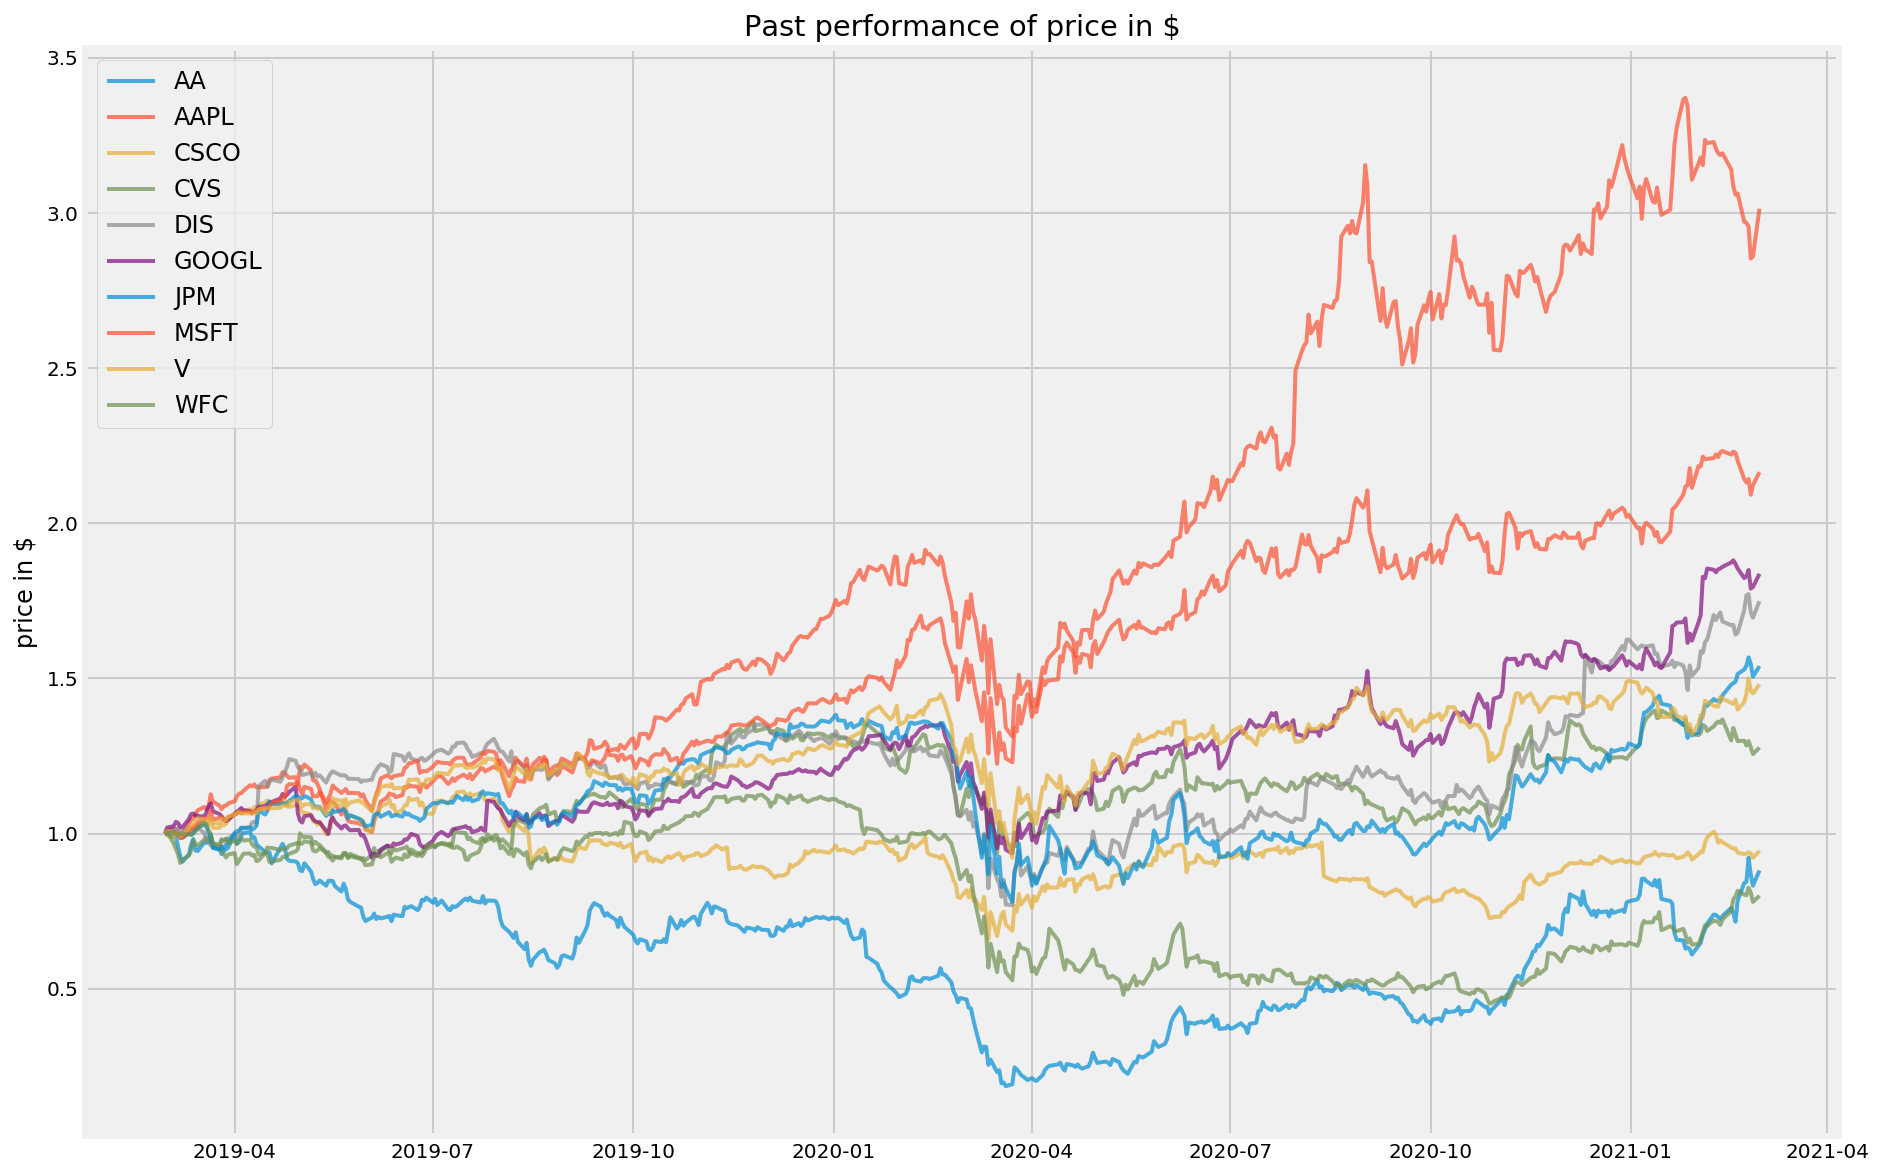

In [71]:
plt.figure(figsize=(14, num_stocks))
for c in table.columns.values:
    plt.plot(table.index, table[c]/table.loc[table.index[0],c], lw=2, alpha=0.7,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')
plt.title('Past performance of price in $')

Text(0.5, 1.0, 'Past performance on daily returns')

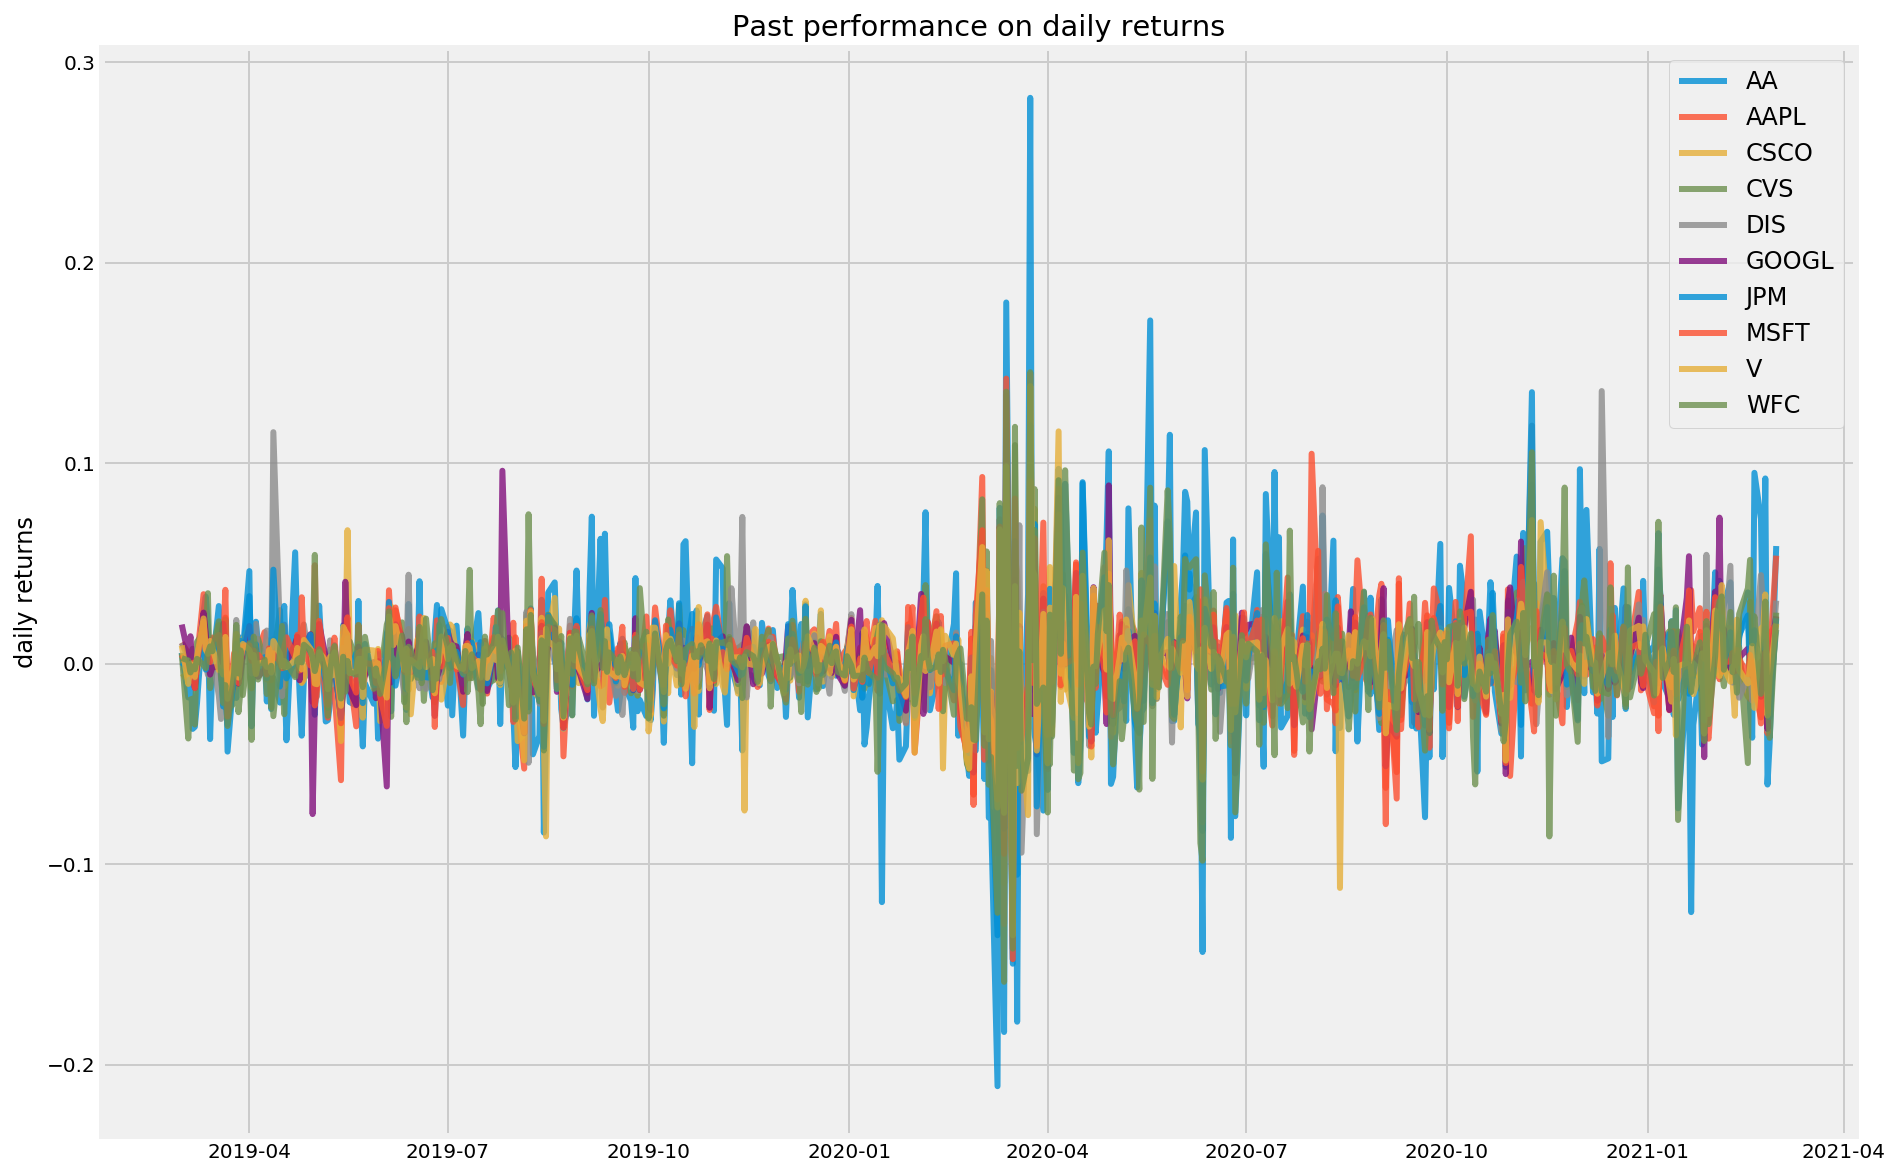

In [72]:
returns = table.pct_change()
plt.figure(figsize=(14, num_stocks))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')
plt.title('Past performance on daily returns')

In [73]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(num_stocks)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [74]:
returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
expected_returns = pd.Series(expected_daily_returns, index = stocks)

returns_rf = returns.copy()
returns_rf['rf'] = rf/252
mean_returns_rf = returns_rf.mean()
cov_matrix_rf = returns_rf.cov()

expected_returns_rf = expected_returns.copy()
expected_returns_rf['rf'] = rf/252

num_portfolios = 100000
risk_free_rate = rf

print("mean_return(daily) in the past 2 years:")
print(mean_returns)
print('\n')
print("expected_returns(daily) in the investment period:")
print(expected_returns)
type(mean_returns)

mean_return(daily) in the past 2 years:
AA       0.000606
AAPL     0.002471
CSCO     0.000118
CVS      0.000699
DIS      0.001408
GOOGL    0.001418
JPM      0.001189
MSFT     0.001763
V        0.000996
WFC     -0.000005
dtype: float64


expected_returns(daily) in the investment period:
AA       0.001825
AAPL     0.000794
CSCO     0.000556
CVS      0.001190
DIS      0.000349
GOOGL    0.000437
JPM      0.001032
MSFT     0.000476
V        0.000294
WFC      0.001111
dtype: float64


pandas.core.series.Series

In [75]:

def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,2.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [76]:

def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,2.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [77]:

def efficient_return(mean_returns, cov_matrix, target, rf = False):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    
    if rf == True:
        bounds = tuple((0,2) for asset in range(num_assets-1)) + tuple((-1,1) for i in range(1))
    else:
        bounds = tuple((0,2) for asset in range(num_assets))
            
        
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range, rf = False):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret, rf))
    return efficients

In [78]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, return_target=0):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    if return_target!=0:
        target_min_vol = efficient_return(expected_returns, cov_matrix, return_target)
        target_sdp_min, target_rp_min = portfolio_annualised_performance(target_min_vol['x'], mean_returns, cov_matrix)
        target_min_vol_allocation = pd.DataFrame(target_min_vol.x,index=table.columns,columns=['allocation'])
        target_min_vol_allocation.allocation = [round(i*100,2)for i in target_min_vol_allocation.allocation]
        target_min_vol_allocation = target_min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Global Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    if return_target!=0:
        print ("-"*80)
        print ("Optimal Portfolio for Target Return Allocation\n")
        print ("Annualised Return:", round(target_rp_min,2))
        print ("Annualised Volatility:", round(target_sdp_min,2))
        print ("\n")
        print (target_min_vol_allocation)
    
    plt.figure(figsize=(10, num_stocks))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=1)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio Portfolio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Gobal Minimum volatility Portfolio')
    if return_target!=0:
        plt.scatter(efficient_return(expected_returns, cov_matrix, return_target).fun ,return_target,marker='*',color='b',s=500, label='Optimal Portfolio for Target Return')
    plt.title('Portfolio Optimization based on Simulation')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)


In [79]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, expected_return = False, return_target=0):
    
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    if return_target!=0:
        if expected_return == True:
            target_min_vol = efficient_return(expected_returns_rf, cov_matrix_rf, return_target, rf = True)
            target_sdp_min, target_rp_min = portfolio_annualised_performance(target_min_vol['x'], expected_returns_rf, cov_matrix_rf)
            target_min_vol_allocation = pd.DataFrame(target_min_vol.x,index=table_rf.columns,columns=['allocation'])
            target_min_vol_allocation.allocation = [round(i*100,2)for i in target_min_vol_allocation.allocation]
            target_min_vol_allocation = target_min_vol_allocation.T
        else:
            target_min_vol = efficient_return(mean_returns_rf, cov_matrix_rf, return_target, rf = True)
            target_sdp_min, target_rp_min = portfolio_annualised_performance(target_min_vol['x'], mean_returns_rf, cov_matrix_rf)
            target_min_vol_allocation = pd.DataFrame(target_min_vol.x,index=table_rf.columns,columns=['allocation'])
            target_min_vol_allocation.allocation = [round(i*100,2)for i in target_min_vol_allocation.allocation]
            target_min_vol_allocation = target_min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Global Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    if return_target!=0:
        print ("-"*80)
        print ("Optimal Portfolio for Target Return Allocation\n")
        print ("Annualised Return:", round(target_rp_min,2))
        print ("Annualised Volatility:", round(target_sdp_min,2))
        print ("\n")
        print (target_min_vol_allocation)
    
    plt.figure(figsize=(10, num_stocks))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=1)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio Portfolio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Global Minimum volatility Portfolio')
    
    if return_target!=0:
        plt.scatter(target_sdp_min, return_target, marker='*',color='b',s=500, label='Optimal Portfolio for Target Return')
        
    target = np.linspace(rp_min, max(mean_returns)*252, 50)
    target_rf = np.linspace(risk_free_rate, rp * 2)
        
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target, rf = False)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-', lw = 2, alpha=0.3, color='black', label='efficient frontier')
    
    if expected_return == True:
        capital_allocation_line = efficient_frontier(expected_returns_rf, cov_matrix_rf, target_rf, rf = True)
        plt.plot([p['fun'] for p in capital_allocation_line], target_rf, linestyle='-.', lw = 3, alpha=0.7, color='black', label='capital allocation line')
    else:
        capital_allocation_line = efficient_frontier(mean_returns_rf, cov_matrix_rf, target_rf, rf = True)
        plt.plot([p['fun'] for p in capital_allocation_line], target_rf, linestyle='-.', lw = 3, alpha=0.7, color='black', label='capital allocation line')
    
    plt.title('Portfolio Optimization based on Efficient Frontier and Capital Allocation Line')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

In [80]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate, expected_return = False, return_target=0):
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    if return_target!=0:
        if expected_return == True:
            target_min_vol = efficient_return(expected_returns_rf, cov_matrix_rf, return_target, rf = True)
            target_sdp_min, target_rp_min = portfolio_annualised_performance(target_min_vol['x'], expected_returns_rf, cov_matrix_rf)
            target_min_vol_allocation = pd.DataFrame(target_min_vol.x,index=table_rf.columns,columns=['allocation'])
            target_min_vol_allocation.allocation = [round(i*100,2)for i in target_min_vol_allocation.allocation]
            target_min_vol_allocation = target_min_vol_allocation.T
        else:
            target_min_vol = efficient_return(mean_returns_rf, cov_matrix_rf, return_target, rf = True)
            target_sdp_min, target_rp_min = portfolio_annualised_performance(target_min_vol['x'], mean_returns_rf, cov_matrix_rf)
            target_min_vol_allocation = pd.DataFrame(target_min_vol.x,index=table_rf.columns,columns=['allocation'])
            target_min_vol_allocation.allocation = [round(i*100,2)for i in target_min_vol_allocation.allocation]
            target_min_vol_allocation = target_min_vol_allocation.T
    
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Global Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    if return_target!=0:
        print ("-"*80)
        print ("Optimal Portfolio for Target Return Allocation\n")
        print ("Annualised Return:", round(target_rp_min,2))
        print ("Annualised Volatility:", round(target_sdp_min,2))
        print ("\n")
        print (target_min_vol_allocation)
    
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(table.columns):
        print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, num_stocks))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(table.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe Ratio Portfolio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Global Minimum volatility Portfolio')
    
    if return_target!=0:
        plt.scatter(target_sdp_min, return_target, marker='*',color='b',s=500, label='Optimal Portfolio for Target Return')
        
    target = np.linspace(rp_min, max(mean_returns)*252, 50)
    target_rf = np.linspace(risk_free_rate, rp * 2)
        
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target, rf = False)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-', lw = 2, alpha=0.3, color='black', label='efficient frontier')
    
    if expected_return == True:
        capital_allocation_line = efficient_frontier(expected_returns_rf, cov_matrix_rf, target_rf, rf = True)
        plt.plot([p['fun'] for p in capital_allocation_line], target_rf, linestyle='-.', lw = 3, alpha=0.7, color='black', label='capital allocation line')
    else:
        capital_allocation_line = efficient_frontier(mean_returns_rf, cov_matrix_rf, target_rf, rf = True)
        plt.plot([p['fun'] for p in capital_allocation_line], target_rf, linestyle='-.', lw = 3, alpha=0.7, color='black', label='capital allocation line')
    
    ax.set_title('Portfolio Optimization based on Efficient Frontier and Capital Allocation Line')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.44
Annualised Volatility: 0.31


              AA   AAPL  CSCO   CVS   DIS  GOOGL   JPM   MSFT     V   WFC
allocation  5.15  34.14  0.25  7.96  0.88   20.8  7.47  23.07  0.12  0.15
--------------------------------------------------------------------------------
Global Minimum Volatility Portfolio Allocation

Annualised Return: 0.3
Annualised Volatility: 0.27


              AA  AAPL  CSCO   CVS    DIS  GOOGL   JPM   MSFT     V   WFC
allocation  0.38  4.24  9.42  23.5  15.36  23.76  0.57  16.46  5.07  1.25
--------------------------------------------------------------------------------


***It is a optimization base on the past performance in return***


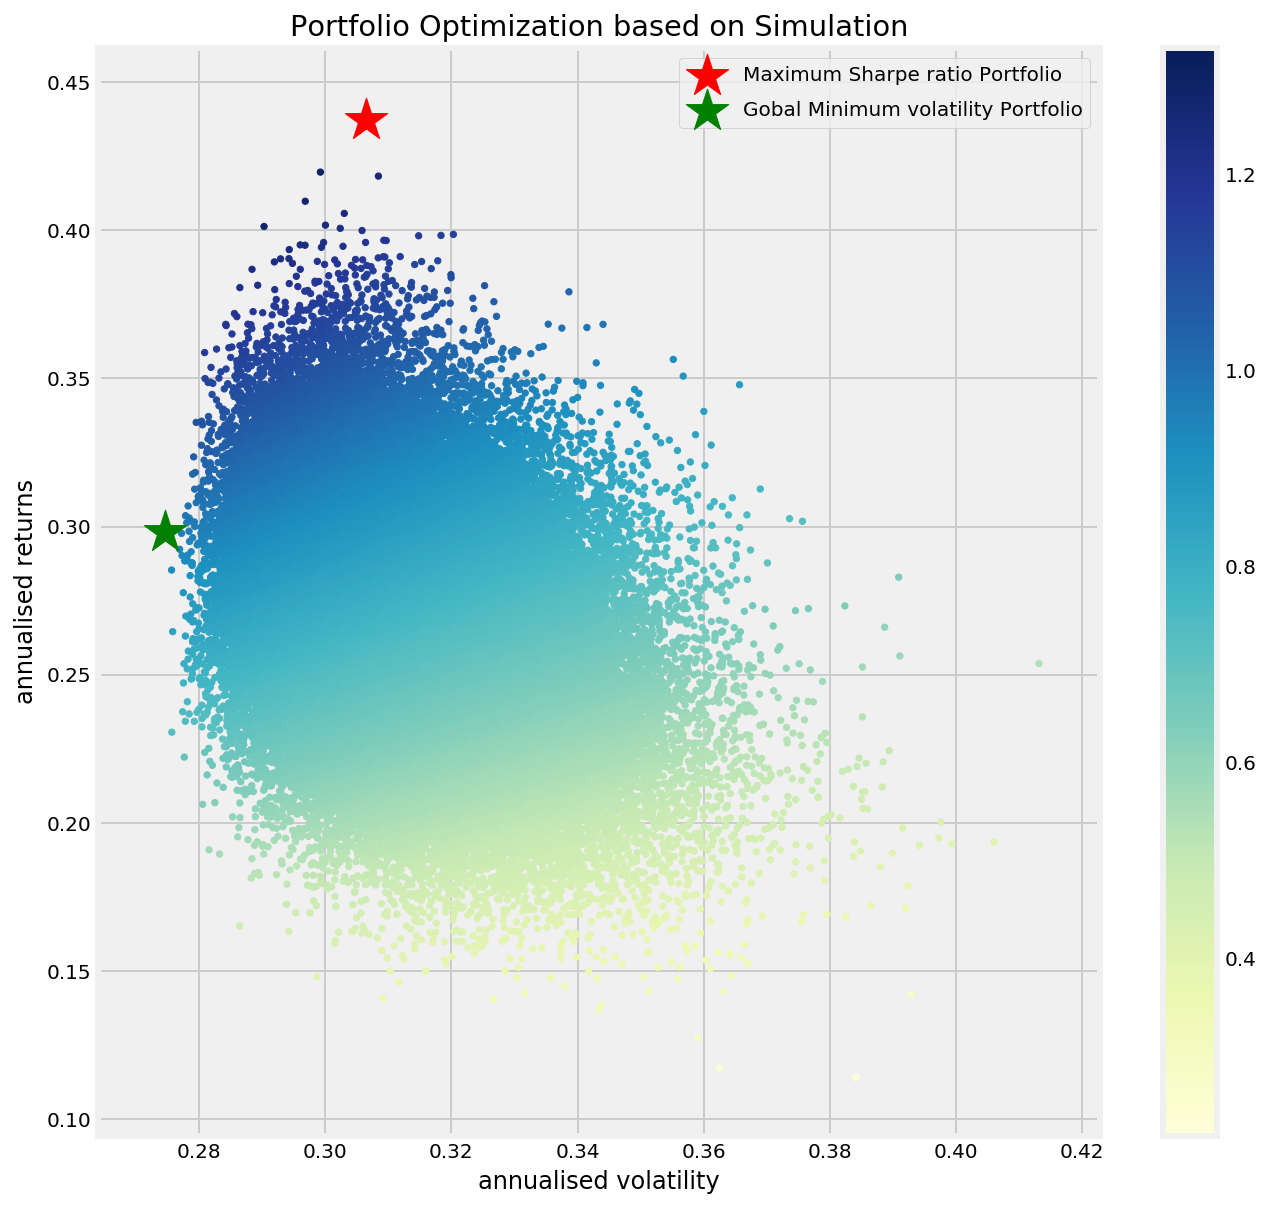

In [87]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)
print ("-"*80)
print("\n\n***It is a optimization base on the past performance in return***")

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.6
Annualised Volatility: 0.36


             AA   AAPL  CSCO  CVS   DIS  GOOGL  JPM  MSFT    V  WFC
allocation  0.0  92.33   0.0  0.0  7.67    0.0  0.0   0.0  0.0  0.0
--------------------------------------------------------------------------------
Global Minimum Volatility Portfolio Allocation

Annualised Return: 0.25
Annualised Volatility: 0.27


             AA  AAPL   CSCO    CVS    DIS  GOOGL  JPM  MSFT    V  WFC
allocation  0.0  3.36  13.07  36.84  10.26  28.98  0.0   0.0  7.5  0.0
--------------------------------------------------------------------------------
Optimal Portfolio for Target Return Allocation

Annualised Return: 0.22
Annualised Volatility: 0.12


             AA  AAPL  CSCO  CVS   DIS  GOOGL  JPM  MSFT    V  WFC     rf
allocation  0.0  30.7   0.0  0.0  2.47    0.0  0.0   0.0  0.0  0.0  66.83
-------------------------------

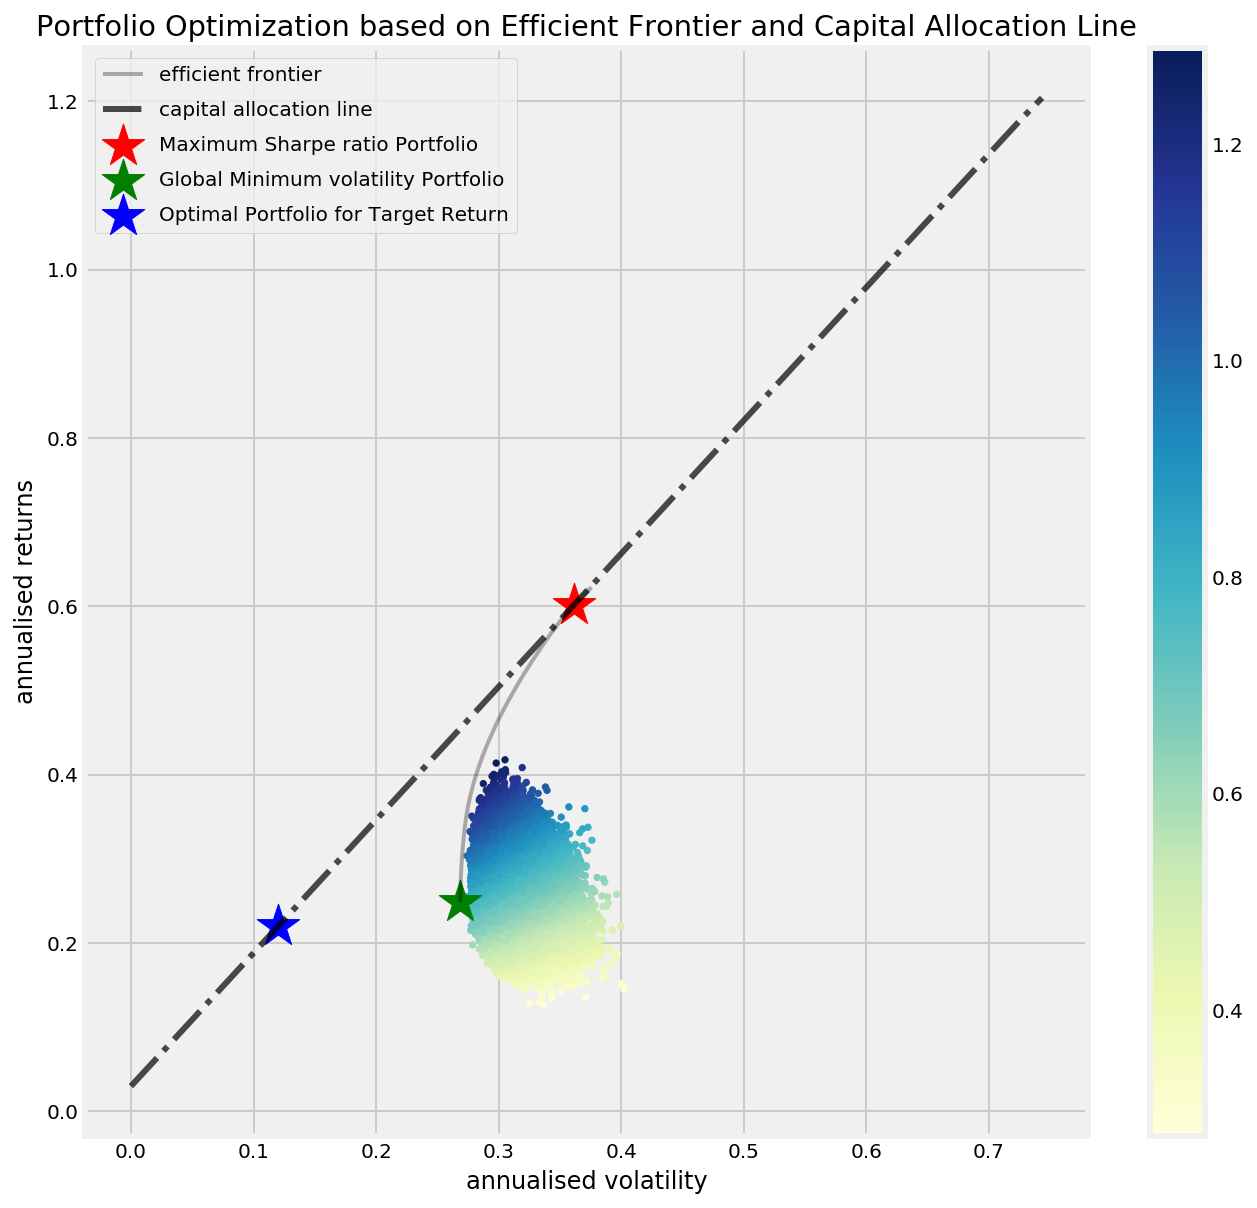

In [82]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, expected_return = False, return_target = return_target)
print ("-"*80)
print("\n\n***It is a optimization base on the past performance in return***")

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.6
Annualised Volatility: 0.36


             AA   AAPL  CSCO  CVS   DIS  GOOGL  JPM  MSFT    V  WFC
allocation  0.0  92.33   0.0  0.0  7.67    0.0  0.0   0.0  0.0  0.0
--------------------------------------------------------------------------------
Global Minimum Volatility Portfolio Allocation

Annualised Return: 0.25
Annualised Volatility: 0.27


             AA  AAPL   CSCO    CVS    DIS  GOOGL  JPM  MSFT    V  WFC
allocation  0.0  3.36  13.07  36.84  10.26  28.98  0.0   0.0  7.5  0.0
--------------------------------------------------------------------------------
Optimal Portfolio for Target Return Allocation

Annualised Return: 0.22
Annualised Volatility: 0.12


             AA  AAPL  CSCO  CVS   DIS  GOOGL  JPM  MSFT    V  WFC     rf
allocation  0.0  30.7   0.0  0.0  2.47    0.0  0.0   0.0  0.0  0.0  66.83
-------------------------------

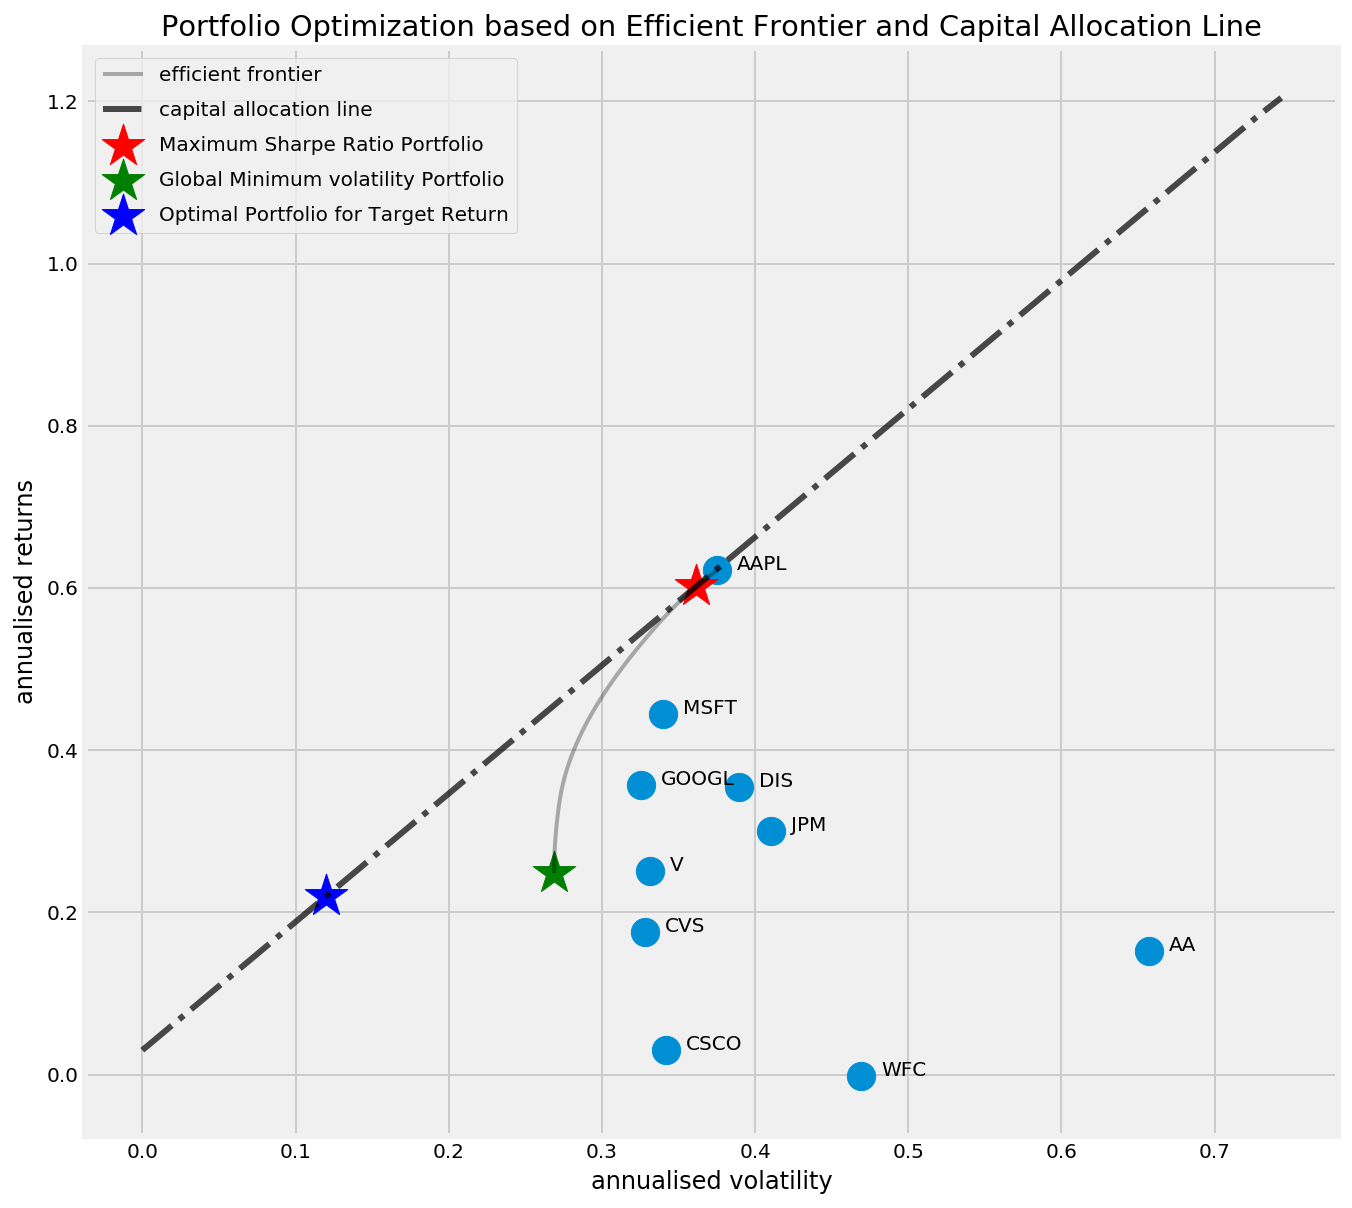

In [83]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate, expected_return = False, return_target = return_target)
print ("-"*80)
print("\n\n***It is a optimization base on the past performance in return***")

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.27
Annualised Volatility: 0.32


              AA   AAPL  CSCO    CVS   DIS  GOOGL    JPM  MSFT     V   WFC
allocation  14.5  17.77   0.8  33.13  5.47   3.66  18.26  0.36  2.19  3.87
--------------------------------------------------------------------------------
Global Minimum Volatility Portfolio Allocation

Annualised Return: 0.18
Annualised Volatility: 0.27


             AA  AAPL  CSCO    CVS    DIS  GOOGL   JPM  MSFT    V   WFC
allocation  1.1  2.68  8.86  32.46  18.06  20.83  3.57  5.23  6.3  0.91


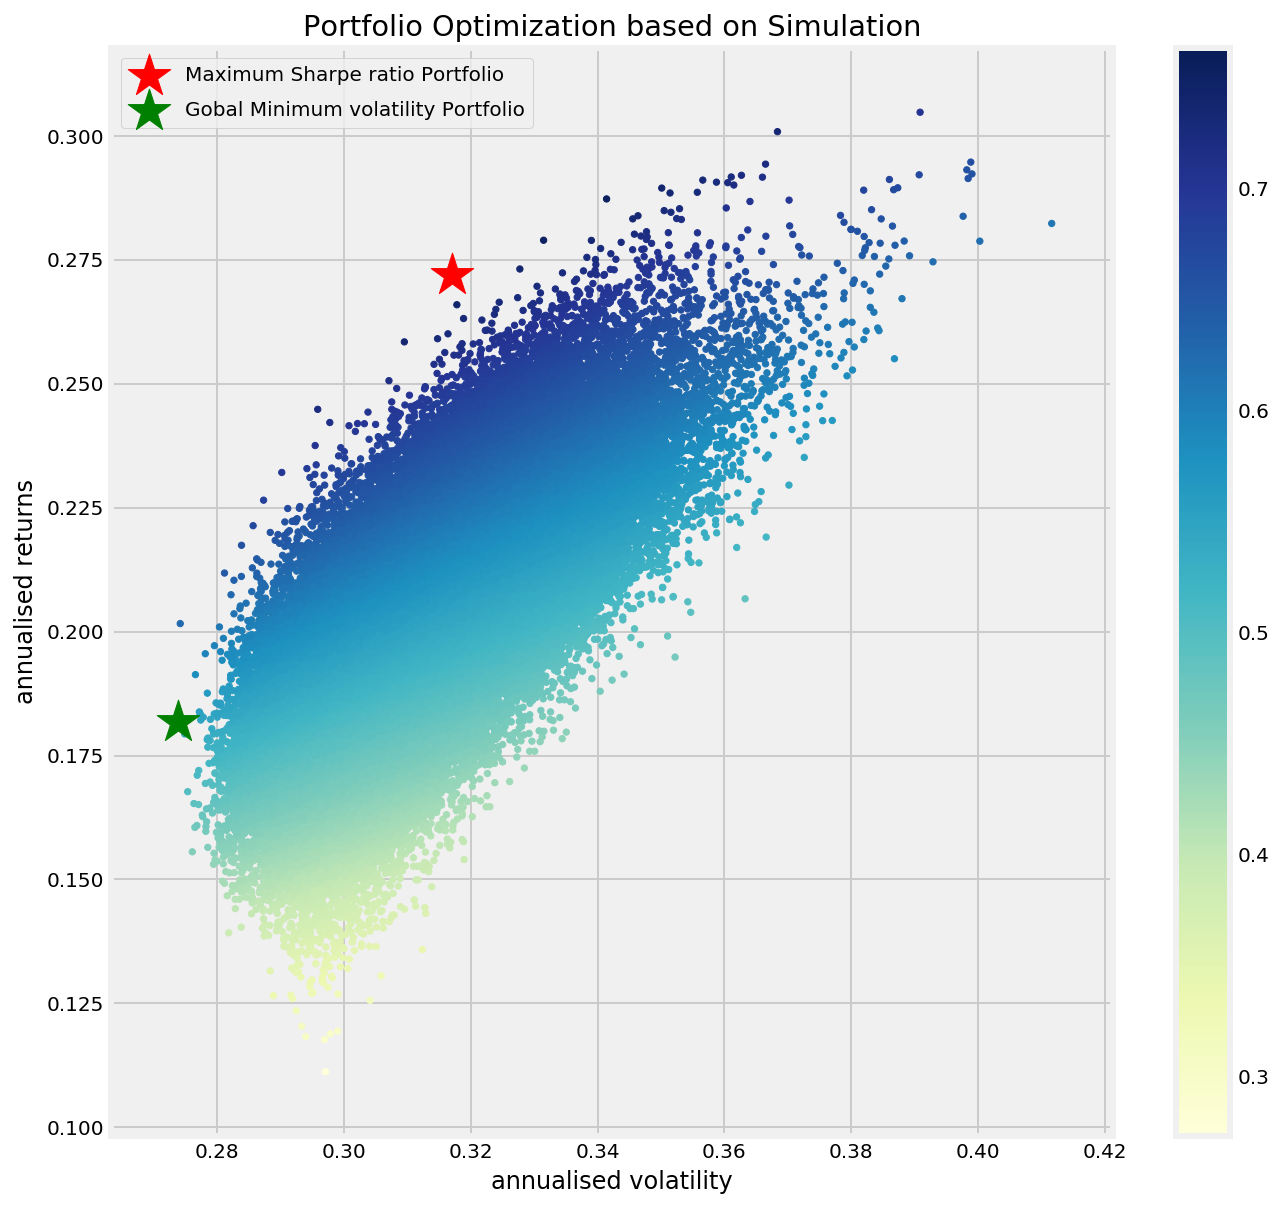

In [88]:
display_simulated_ef_with_random(expected_returns, cov_matrix, num_portfolios, risk_free_rate)



--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.33
Annualised Volatility: 0.34


               AA  AAPL  CSCO    CVS  DIS  GOOGL  JPM  MSFT    V  WFC
allocation  22.07  0.95   0.0  76.97  0.0    0.0  0.0   0.0  0.0  0.0
--------------------------------------------------------------------------------
Global Minimum Volatility Portfolio Allocation

Annualised Return: 0.18
Annualised Volatility: 0.27


             AA  AAPL   CSCO    CVS    DIS  GOOGL  JPM  MSFT    V  WFC
allocation  0.0  3.36  13.07  36.84  10.26  28.98  0.0   0.0  7.5  0.0
--------------------------------------------------------------------------------
Optimal Portfolio for Target Return Allocation

Annualised Return: 0.22
Annualised Volatility: 0.21


               AA  AAPL  CSCO    CVS  DIS  GOOGL  JPM  MSFT    V  WFC     rf
allocation  13.68   0.7   0.0  48.14  0.0    0.0  0.0   0.0  0.0  0.0  37.48


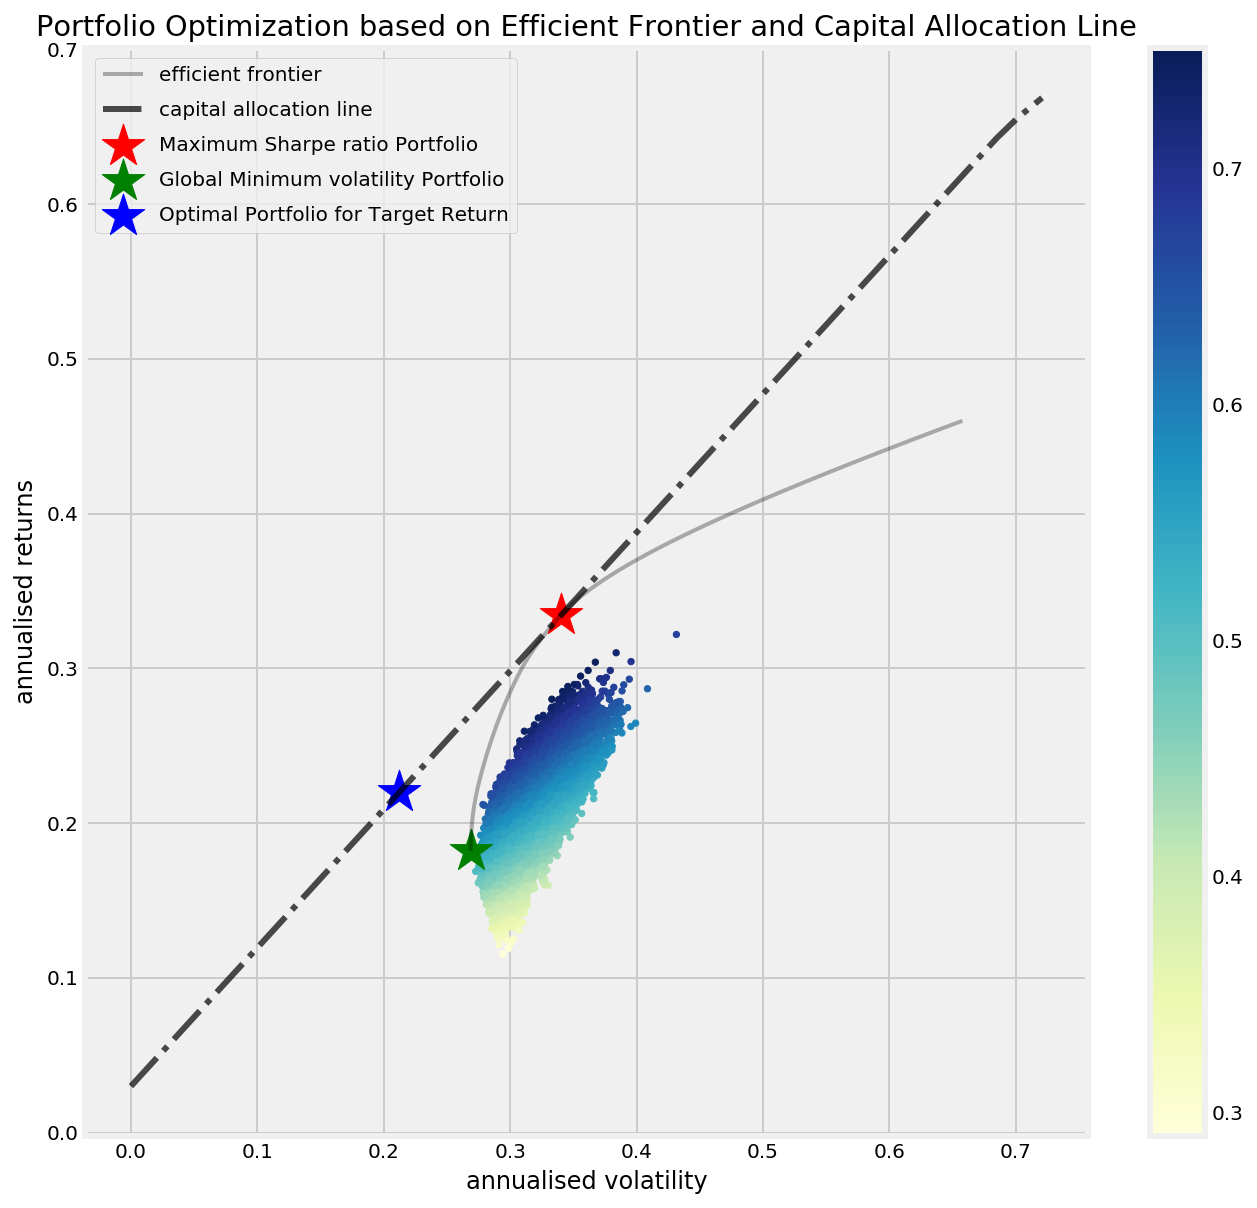

In [85]:
display_calculated_ef_with_random(expected_returns, cov_matrix, num_portfolios, risk_free_rate, expected_return = True, return_target = return_target)



--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.33
Annualised Volatility: 0.34


               AA  AAPL  CSCO    CVS  DIS  GOOGL  JPM  MSFT    V  WFC
allocation  22.07  0.95   0.0  76.97  0.0    0.0  0.0   0.0  0.0  0.0
--------------------------------------------------------------------------------
Global Minimum Volatility Portfolio Allocation

Annualised Return: 0.18
Annualised Volatility: 0.27


             AA  AAPL   CSCO    CVS    DIS  GOOGL  JPM  MSFT    V  WFC
allocation  0.0  3.36  13.07  36.84  10.26  28.98  0.0   0.0  7.5  0.0
--------------------------------------------------------------------------------
Optimal Portfolio for Target Return Allocation

Annualised Return: 0.22
Annualised Volatility: 0.21


               AA  AAPL  CSCO    CVS  DIS  GOOGL  JPM  MSFT    V  WFC     rf
allocation  13.68   0.7   0.0  48.14  0.0    0.0  0.0   0.0  0.0  0.0  37.48
--------------------

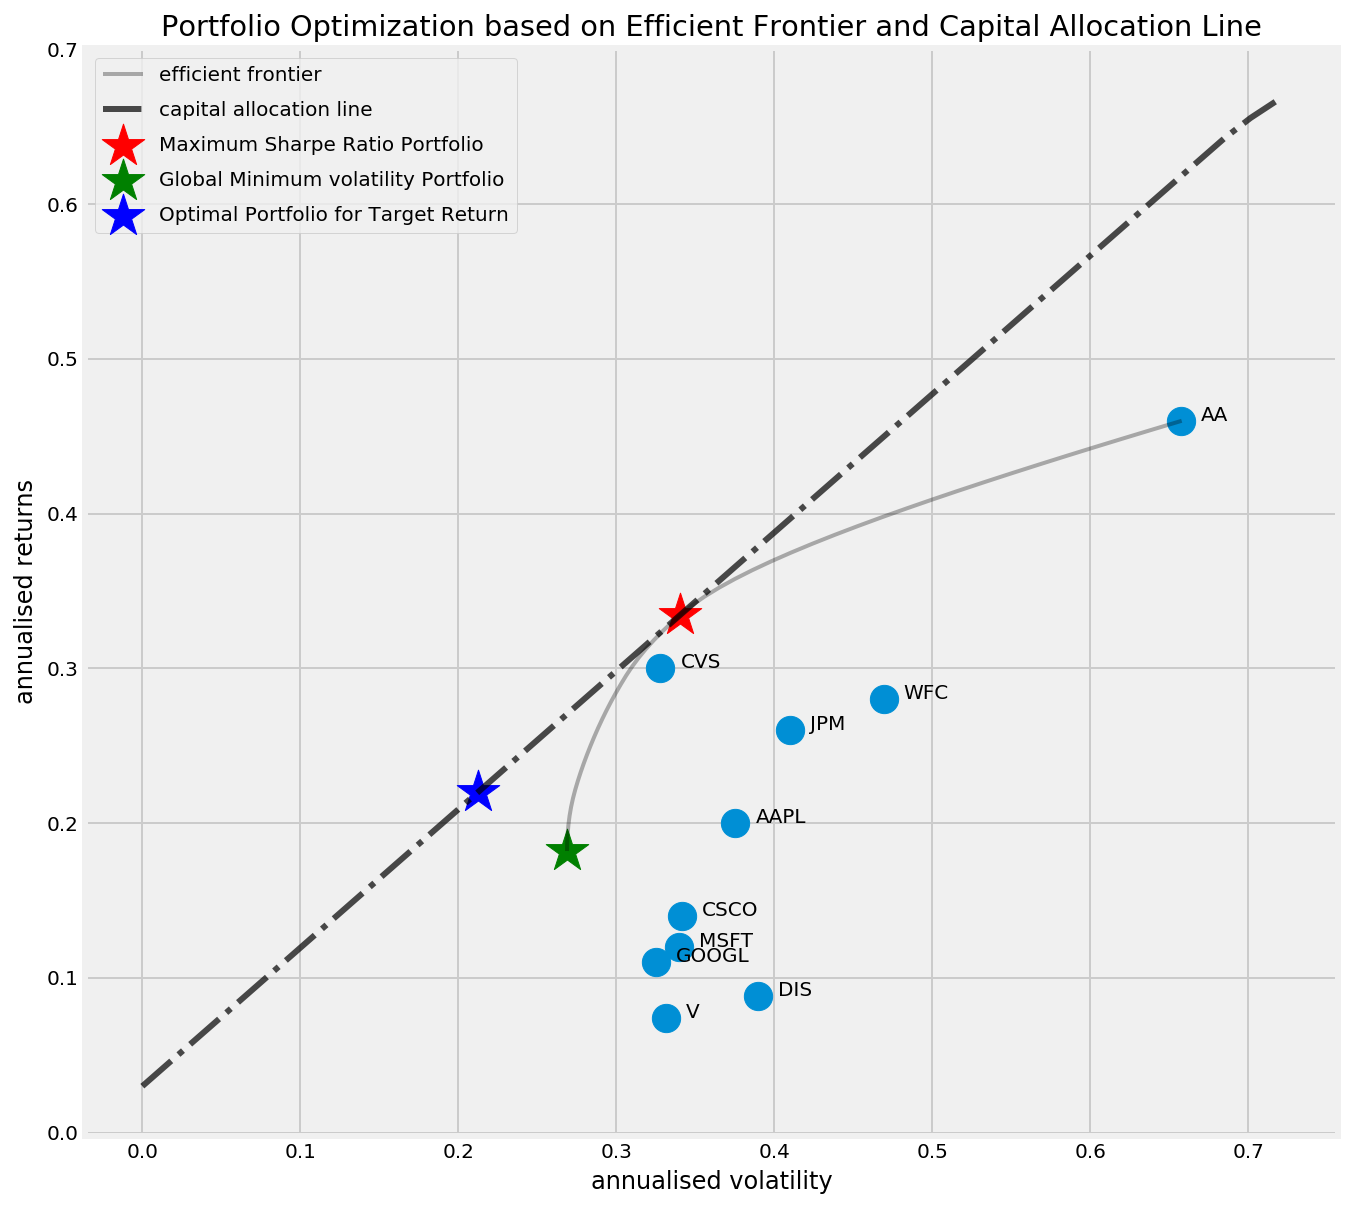

In [86]:
display_ef_with_selected(expected_returns, cov_matrix, risk_free_rate, expected_return = True, return_target = return_target)